# Package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import random

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from nltk.tokenize import word_tokenize
from collections import Counter

# Data Preparation

In [ ]:
data2 = pd.read_csv("df22.csv", delimiter=',')
df2 = pd.DataFrame(data2)

df2.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,4.0,Super good,General Affair,2022
1,id,NaN,Tidak ada,General Affair,2022
2,id,NaN,ok,General Affair,2022
3,id,NaN,baik,General Affair,2022
4,id,3.0,kampus sangat bersih dan tertata dengan rapih,General Affair,2022


In [ ]:
df2.loc[0, 'Bahasa'] = 'en'

In [ ]:
len(df2)

9922

In [ ]:
data3 = pd.read_csv("df23.csv", delimiter=',')
df3 = pd.DataFrame(data3)

df3.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,3.0,-,Registrar Office,2023
1,id,4.0,Sudah baik,Registrar Office,2023
2,id,3.0,-,Registrar Office,2023
3,id,4.0,Layanannya sangat baik,Registrar Office,2023
4,id,4.0,Sudah baik lanjutkan,Registrar Office,2023


In [ ]:
len(df3)

10938

In [ ]:
data4 = pd.read_csv("df24.csv", delimiter=',')
df4 = pd.DataFrame(data4)

df4.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,id,4.0,"tidak saran dari saya, semua sudah cukup baik",Registrar Office,2024
1,id,3.0,Lebih fast respon di jam kerja.,Registrar Office,2024
2,id,4.0,Semuanya lebih baik digabungkan menjadi satu u...,Registrar Office,2024
3,id,4.0,Menurut saya layanan nya sudah baik,Registrar Office,2024
4,id,3.0,tidak ada,Registrar Office,2024


In [ ]:
len(df4)

10382

In [ ]:
df = pd.concat([df2, df3, df4])
df.head()

,Bahasa,Penilaian,Saran,Kategori,Tahun
0,en,4.0,Super good,General Affair,2022
1,id,NaN,Tidak ada,General Affair,2022
2,id,NaN,ok,General Affair,2022
3,id,NaN,baik,General Affair,2022
4,id,3.0,kampus sangat bersih dan tertata dengan rapih,General Affair,2022


In [ ]:
df['Penilaian'] = pd.to_numeric(df['Penilaian'], errors='coerce').round(0).astype('Int64')

In [ ]:
df = df.dropna(subset=['Penilaian'])

In [ ]:
df.replace(2, 0, inplace=True)
df.replace(1, 0, inplace=True)
df.replace(3, 1, inplace=True)
df.replace(4, 1, inplace=True)


In [ ]:
df = df[df['Penilaian'] != 702]

In [ ]:
df['Kategori'] = df['Kategori'].replace('Fasilitas Difabel', 'General Affair')
df['Kategori'] = df['Kategori'].replace('Konseling HOPE', 'Student Life')
df = df[df['Kategori'] != 'GPIO']

#df['Kategori'] = df['Kategori'].replace('GPIO', 'General Affair')

<ipython-input-51-4484954b25c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kategori'] = df['Kategori'].replace('Fasilitas Difabel', 'General Affair')
<ipython-input-51-4484954b25c1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Kategori'] = df['Kategori'].replace('Konseling HOPE', 'Student Life')


In [ ]:
nan_count = df['Penilaian'].isna().sum()
print(nan_count)


0


In [ ]:
unique_count = df['Penilaian'].nunique()
print("Number of unique numbers in 'Penilaian':", unique_count)


Number of unique numbers in 'Penilaian': 2


In [ ]:
unique_values = df['Penilaian'].unique()
print("Unique values in 'Penilaian':", unique_values)

Unique values in 'Penilaian': <IntegerArray>
[1, 0]
Length: 2, dtype: Int64


In [ ]:
penilaian_counts = df['Penilaian'].value_counts()
print("Count of 1 in 'Penilaian':", penilaian_counts.get(1, 0))
print("Count of 0 in 'Penilaian':", penilaian_counts.get(0, 0))


Count of 1 in 'Penilaian': 22475
Count of 0 in 'Penilaian': 5184


In [ ]:
penilaian_counts = df['Bahasa'].value_counts()

In [ ]:
penilaian_counts

,count
Bahasa,
id,27406
en,253


# EDA

In [ ]:
unique_values = df['Kategori'].unique()
print(f"Unique values: {unique_values}")


Unique values: ['General Affair' 'Olahraga' 'Registrar Office' 'Perpustakaan'
 'Student Life' 'Career Center' 'Keuangan' 'Pengalaman Belajar' 'UPH Wifi'
 'UPH Mobile' 'IT Service Desk UPH']


In [ ]:
df0 = df[df['Penilaian']==0]
df1 = df[df['Penilaian']==1]

df01 = df[df['Kategori']=='General Affair']
df02 = df[df['Kategori']=='Olahraga']
df03 = df[df['Kategori']=='Registrar Office']
df04 = df[df['Kategori']=='Perpustakaan']
df05 = df[df['Kategori']=='Career Center']
df06 = df[df['Kategori']=='Student Life']
df07 = df[df['Kategori']=='Pengalaman Belajar']
df08 = df[df['Kategori']=='UPH Wifi']
df09 = df[df['Kategori']=='UPH Mobile']
df010 = df[df['Kategori']=='IT Service Desk UPH']
df011 = df[df['Kategori']=='Keuangan']
#df012 = df[df['Kategori']=='GPIO']

In [ ]:
dfs = {
    "df01 (General Affair)": df01,
    "df02 (Olahraga)": df02,
    "df03 (Registrar Office)": df03,
    "df04 (Perpustakaan)": df04,
    "df05 (Career Center)": df05,
    "df06 (Student Life)": df06,
    "df07 (Pengalaman Belajar)": df07,
    "df08 (UPH Wifi)": df08,
    "df09 (UPH Mobile)": df09,
    "df10 (IT Service Desk UPH)": df010,
    "df11 (Keuangan)": df011,
}

results = {}

for name, df in dfs.items():
    counts = df["Penilaian"].value_counts()  # Count occurrences of 0 and 1
    results[name] = {
        "0s": counts.get(0, 0),  # Get count of 0s, default to 0 if not present
        "1s": counts.get(1, 0),  # Get count of 1s, default to 0 if not present
    }

# Print the results
for name, counts in results.items():
    print(f"{name}: 0s = {counts['0s']}, 1s = {counts['1s']}")


df01 (General Affair): 0s = 674, 1s = 3410
df02 (Olahraga): 0s = 302, 1s = 1335
df03 (Registrar Office): 0s = 418, 1s = 2398
df04 (Perpustakaan): 0s = 447, 1s = 3094
df05 (Career Center): 0s = 79, 1s = 422
df06 (Student Life): 0s = 351, 1s = 3200
df07 (Pengalaman Belajar): 0s = 743, 1s = 3542
df08 (UPH Wifi): 0s = 845, 1s = 414
df09 (UPH Mobile): 0s = 804, 1s = 2463
df10 (IT Service Desk UPH): 0s = 236, 1s = 1096
df11 (Keuangan): 0s = 285, 1s = 1101


In [ ]:
lengths = {
    "df01 (General Affair)": len(df01),
    "df02 (Olahraga)": len(df02),
    "df03 (Registrar Office)": len(df03),
    "df04 (Perpustakaan)": len(df04),
    "df05 (Career Center)": len(df05),
    "df06 (Student Life)": len(df06),
    "df07 (Pengalaman Belajar)": len(df07),
    "df08 (UPH Wifi)": len(df08),
    "df09 (UPH Mobile)": len(df09),
    "df10 (IT Service Desk UPH)": len(df010),
    "df11 (Keuangan)": len(df011),
}

for key, value in lengths.items():
    print(f"{key}: {value}")


df01 (General Affair): 4084
df02 (Olahraga): 1637
df03 (Registrar Office): 2816
df04 (Perpustakaan): 3541
df05 (Career Center): 501
df06 (Student Life): 3551
df07 (Pengalaman Belajar): 4285
df08 (UPH Wifi): 1259
df09 (UPH Mobile): 3267
df10 (IT Service Desk UPH): 1332
df11 (Keuangan): 1386


In [ ]:
df['Comment_Length'] = df['Saran'].apply(lambda x: len(x.split()))

mean_length_by_class = df.groupby('Penilaian')['Comment_Length'].mean().reset_index()
mean_length_by_class.columns = ['Penilaian', 'Mean_Comment_Length']

mean_length_by_category = df.groupby('Kategori')['Comment_Length'].mean().reset_index()
mean_length_by_category.columns = ['Kategori', 'Mean_Comment_Length']

print("Mean Comment Length by Class:")
print(mean_length_by_class)

print("\nMean Comment Length by Category:")
print(mean_length_by_category)

Mean Comment Length by Class:
   Penilaian  Mean_Comment_Length
0          0            11.404707
1          1             6.374905

Mean Comment Length by Category:
               Kategori  Mean_Comment_Length
0         Career Center             5.433134
1        General Affair             7.748286
2   IT Service Desk UPH             3.853604
3              Keuangan             6.480519
4              Olahraga             7.288943
5    Pengalaman Belajar            11.526021
6          Perpustakaan             7.105620
7      Registrar Office             5.492188
8          Student Life             5.462687
9            UPH Mobile             7.382614
10             UPH Wifi             6.713264


In [ ]:
# Assuming the classes are encoded as integers or strings, e.g., 0, 1, 2
class_mapping = {0: 'Negative', 1: 'Positive'}

# Rename the classes in the 'Class' column
df['Penilaian'] = df['Penilaian'].map(class_mapping)

# Now you can create the pie chart with renamed labels
class_counts = df['Penilaian'].value_counts()

# Data for the pie chart
labels = class_counts.index
sizes = class_counts.values
colors = ['#ff9999','#66b3ff']

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)

plt.axis('equal')
plt.title('Class Distribution')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

def plot_class_distribution_pie(df):
    # Define the class mapping
    class_mapping = {0: 'Negative', 1: 'Positive'}

    # Rename the classes in the 'Penilaian' column
    df['Penilaian'] = df['Penilaian'].map(class_mapping)

    # Calculate class counts
    class_counts = df['Penilaian'].value_counts()

    # Data for the pie chart
    labels = class_counts.index
    sizes = class_counts.values
    colors = ['#ff9999', '#66b3ff']

    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors=colors)
    plt.axis('equal')
    plt.title('Class Distribution')
    plt.show()


<ipython-input-49-676c847f98ff>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Penilaian'] = df['Penilaian'].map(class_mapping)


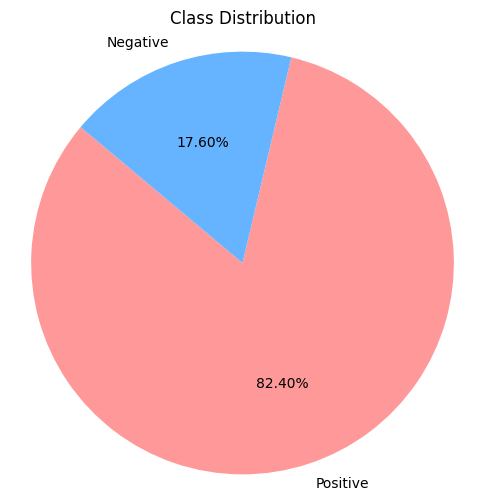

In [ ]:
plot_class_distribution_pie(df01)

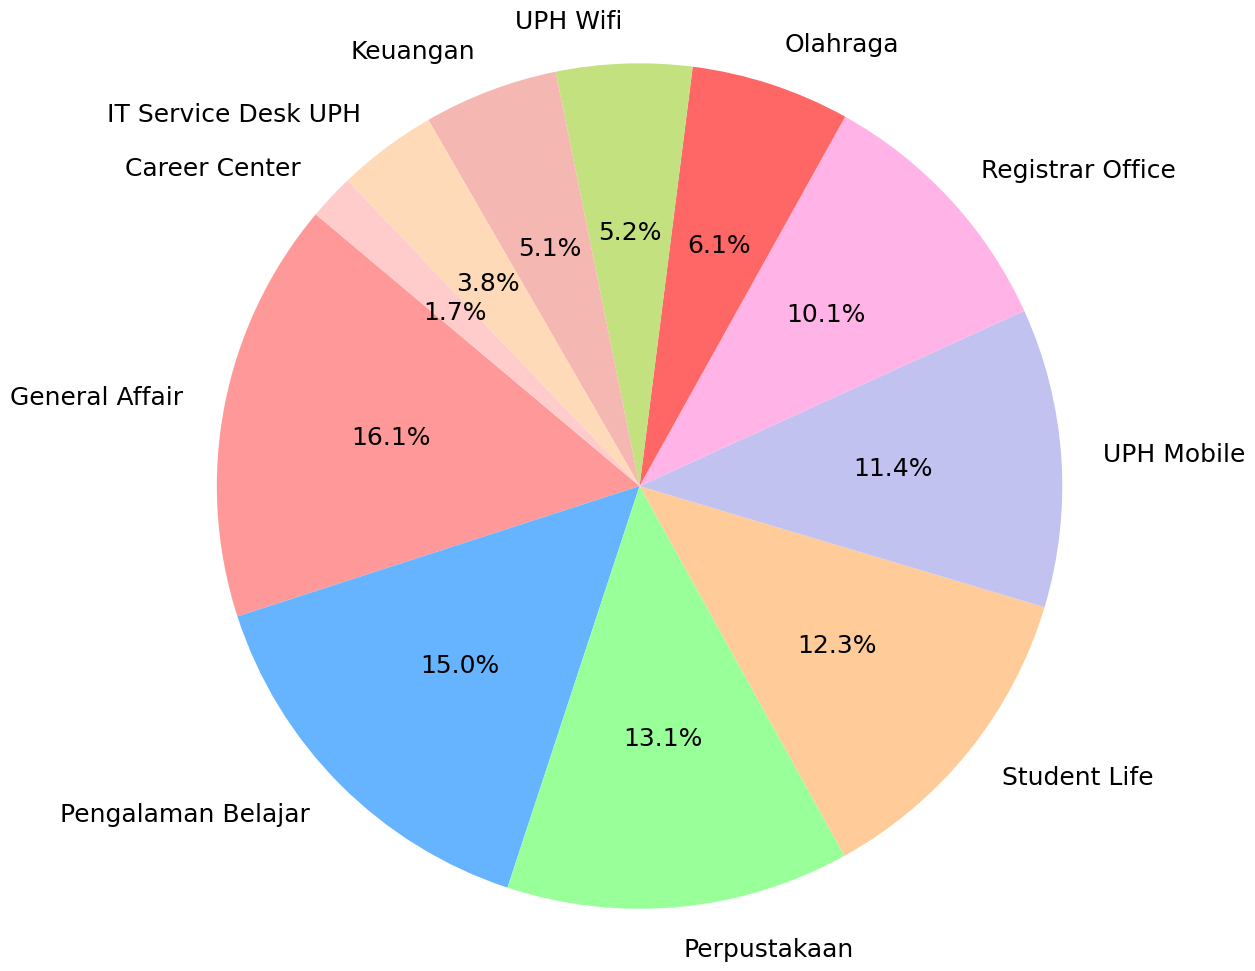

In [ ]:
 # Calculate class counts
class_counts = df['Kategori'].value_counts()

# Data for the pie chart
labels = class_counts.index
sizes = class_counts.values
colors = [
    '#ff9999',  # light red
    '#66b3ff',  # light blue
    '#99ff99',  # light green
    '#ffcc99',  # light orange
    '#c2c2f0',  # light purple
    '#ffb3e6',  # light pink
    '#ff6666',  # red
    '#c4e17f',  # lime green
    '#f5b7b1',  # peach
    '#ffdab9',  # peach puff
    '#ffcccb',  # light coral
    '#98fb98',  # pale green
    '#87cefa',  # light sky blue
    '#ffd700'   # gold
]

# Create the pie chart
plt.figure(figsize=(12, 12))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, textprops={'fontsize': 18})
plt.axis('equal')
plt.show()

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

def plot_top_words_by_class_separately(df, text_column, label_column, label0=0, label1=1, top_n=10):
    # Tokenize and clean text data
    def tokenize_text(text):
        tokens = word_tokenize(text.lower())  # Lowercase and tokenize
        tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and non-alphabetic tokens
        return tokens

    # Tokenize texts and count word frequencies for each class
    tokens_label0 = [token for text in df[df[label_column] == label0][text_column] for token in tokenize_text(text)]
    tokens_label1 = [token for text in df[df[label_column] == label1][text_column] for token in tokenize_text(text)]

    word_freq_label0 = Counter(tokens_label0).most_common(top_n)
    word_freq_label1 = Counter(tokens_label1).most_common(top_n)

    # Print word frequencies for class 0
    print(f"\nTop {top_n} words in Class {label0}:")
    for word, freq in word_freq_label0:
        print(f"{word}: {freq}")

    # Print word frequencies for class 1
    print(f"\nTop {top_n} words in Class {label1}:")
    for word, freq in word_freq_label1:
        print(f"{word}: {freq}")

    # Create DataFrames for visualization
    freq_df_label0 = pd.DataFrame(word_freq_label0, columns=['Word', 'Frequency'])
    freq_df_label1 = pd.DataFrame(word_freq_label1, columns=['Word', 'Frequency'])

    # Plot for class 0
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=freq_df_label0, palette="Blues_d")
    plt.title(f'Top {top_n} Words in Class {label0}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()

    # Plot for class 1
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Frequency', y='Word', data=freq_df_label1, palette="Greens_d")
    plt.title(f'Top {top_n} Words in Class {label1}')
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.show()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df02

,Bahasa,Penilaian,Saran,Kategori,Tahun
1352,en,0,rule asking wear mask gym exercising harmful h...,Olahraga,2022
1384,en,0,places needs maintenance someone gets hurt,Olahraga,2022
1193,en,0,quality table tennis equipments deteriorating ...,Olahraga,2023
1208,en,0,schedule sometime followed students classes gy...,Olahraga,2023
1209,en,0,add uptodate equipments,Olahraga,2023
...,...,...,...,...,...
2153,id,1,bagus,Olahraga,2024
2155,id,1,fasilitas badminton perlu dipertimbangkan perl...,Olahraga,2024
2159,id,1,for the gym i feel like its to small overall t...,Olahraga,2024
2160,id,1,bagus pertahankan,Olahraga,2024



Top 10 words in Class 0:

Top 10 words in Class 1:


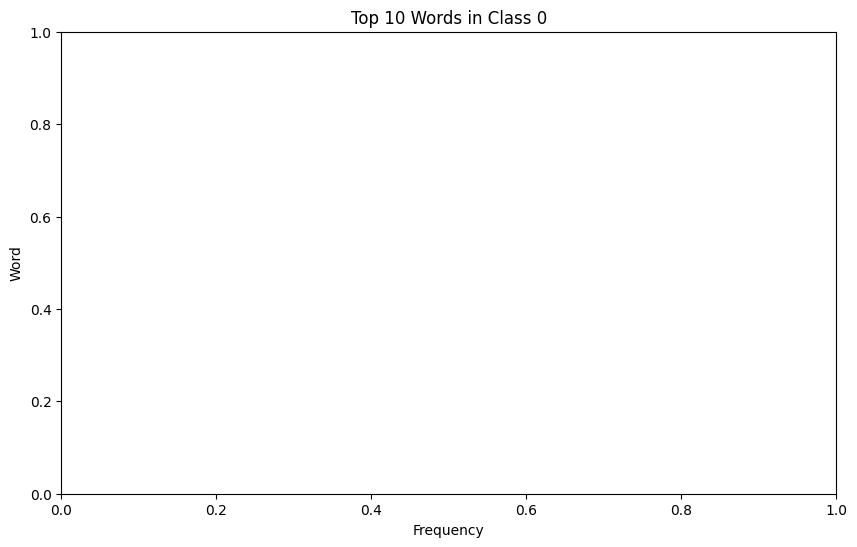

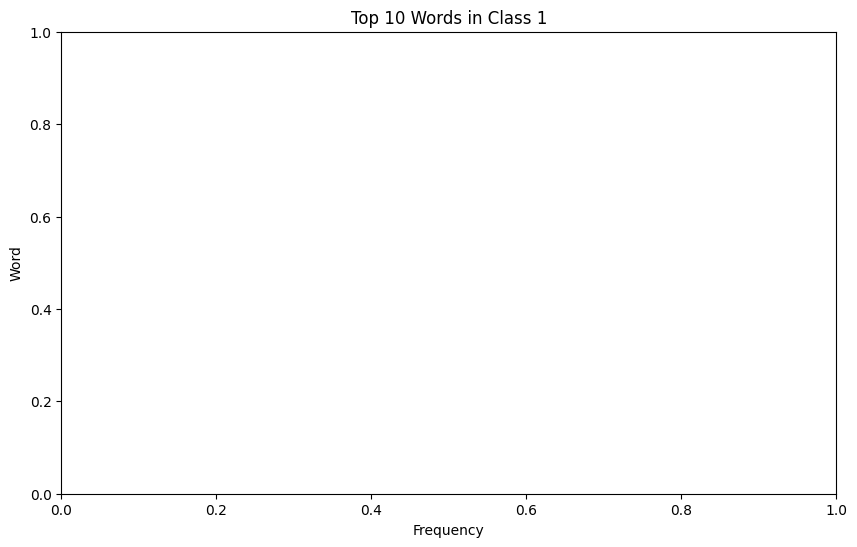

In [ ]:
plot_top_words_by_class_separately(df01, text_column='Saran', label_column='Penilaian', label0=0, label1=1, top_n=10)


In [ ]:
import pandas as pd
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

def print_top_words_by_class(df, text_column, label_column, label0=0, label1=1, top_n=3):
    # Tokenize and clean text data
    def tokenize_text(text):
        tokens = word_tokenize(text.lower())  # Lowercase and tokenize
        tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation and non-alphabetic tokens
        return tokens

    # Tokenize texts and count word frequencies for each class
    tokens_label0 = [token for text in df[df[label_column] == label0][text_column] for token in tokenize_text(text)]
    tokens_label1 = [token for text in df[df[label_column] == label1][text_column] for token in tokenize_text(text)]

    word_freq_label0 = Counter(tokens_label0).most_common(top_n)
    word_freq_label1 = Counter(tokens_label1).most_common(top_n)

    # Print top words for class 0
    print(f"\nTop {top_n} words in Class {label0}:")
    for word, freq in word_freq_label0:
        print(f"{word}: {freq}")

    # Print top words for class 1
    print(f"\nTop {top_n} words in Class {label1}:")
    for word, freq in word_freq_label1:
        print(f"{word}: {freq}")

# Usage example (assuming you have a DataFrame `df` with columns 'text' and 'label')
# print_top_words_by_class(df, text_column='text', label_column='label')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print_top_words_by_class(df011, text_column='Saran', label_column='Penilaian')

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************
